<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Processing-Workbook" data-toc-modified-id="Data-Processing-Workbook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Processing Workbook</a></span><ul class="toc-item"><li><span><a href="#Education-Data" data-toc-modified-id="Education-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Education Data</a></span><ul class="toc-item"><li><span><a href="#Merging-Education-CSV-and-Geometry-Data" data-toc-modified-id="Merging-Education-CSV-and-Geometry-Data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Merging Education CSV and Geometry Data</a></span></li><li><span><a href="#Interpreting-Education-CSV-Data" data-toc-modified-id="Interpreting-Education-CSV-Data-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Interpreting Education CSV Data</a></span></li><li><span><a href="#Joining-Education-and-Municipality-Data" data-toc-modified-id="Joining-Education-and-Municipality-Data-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Joining Education and Municipality Data</a></span></li><li><span><a href="#Aggregating-Education-Data" data-toc-modified-id="Aggregating-Education-Data-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Aggregating Education Data</a></span></li></ul></li><li><span><a href="#Income-Data" data-toc-modified-id="Income-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Income Data</a></span><ul class="toc-item"><li><span><a href="#Merging-Income-CSV-and-Geometry-Data" data-toc-modified-id="Merging-Income-CSV-and-Geometry-Data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Merging Income CSV and Geometry Data</a></span></li><li><span><a href="#Joining-Income-and-Municipality-Data" data-toc-modified-id="Joining-Income-and-Municipality-Data-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Joining Income and Municipality Data</a></span></li><li><span><a href="#Aggregating-Income-Data" data-toc-modified-id="Aggregating-Income-Data-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Aggregating Income Data</a></span></li></ul></li><li><span><a href="#Utility-Data" data-toc-modified-id="Utility-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Utility Data</a></span></li><li><span><a href="#PV-Installations-Data" data-toc-modified-id="PV-Installations-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>PV Installations Data</a></span><ul class="toc-item"><li><span><a href="#Aggregating-PV-Installations-Data" data-toc-modified-id="Aggregating-PV-Installations-Data-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Aggregating PV Installations Data</a></span></li></ul></li></ul></li></ul></div>

# Data Processing Workbook

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
# Data locations

def dataF(x):
    return '/home/lucia/bu/year4/semester2/EE509/project/ee509-project/data/' + x

In [7]:
# Temporary files location

def tempF(x):
    return '/home/lucia/bu/year4/semester2/EE509/project/ee509-project/code/processing/tempFiles/' + x

In [143]:
# Ready data location

def readyF(x):
    return '/home/lucia/bu/year4/semester2/EE509/project/ee509-project/data/ready/' + x

## Education Data

### Merging Education CSV and Geometry Data

In [6]:
ed = pd.read_csv(dataF('educationBlockGroupCSV/ed.csv'))
ed_shp = gpd.read_file(dataF('educationBlockGroupSHP/US_blck_grp_2019.shp'))

In [8]:
ed_join = ed_shp.merge(ed, on='GISJOIN')

<AxesSubplot:>

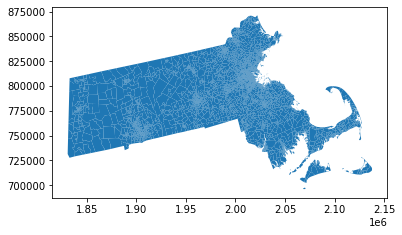

In [77]:
ed_join.plot()

In [9]:
ed_join = ed_join.to_crs('EPSG:26986')
ed_join.crs

<Derived Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
# Save to temp folder

ed_join.to_file(tempF('edjoin/ed_join.shp'))

/home/lucia/miniconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Interpreting Education CSV Data

In [143]:
def edMatch(data):
    
    data_c = data.copy()
    
    cats = {
        'ALWGE002': 0,   # 'no schooling completed'
        'ALWGE003': 2,   # 'nursery school'
        'ALWGE004': 4,   # 'kindergarten'
        'ALWGE005': 5,   # '1st grade'
        'ALWGE006': 6,   # '2nd grade'
        'ALWGE007': 7,   # '3rd grade'
        'ALWGE008': 8,   # '4th grade'
        'ALWGE009': 9,   # '5th grade'
        'ALWGE010': 10,  # '6th grade'
        'ALWGE011': 11,  # '7th grade'
        'ALWGE012': 12,  # '8th grade'
        'ALWGE013': 13,  # '9th grade'
        'ALWGE014': 14,  # '10th grade'
        'ALWGE015': 15,  # '11th grade'
        'ALWGE016': 15,  # '12th grade, no diploma'
        'ALWGE017': 16,  # 'Regular high school diploma'
        'ALWGE018': 16,  # 'GED or alternative credential' (equivalent to high school diploma)
        'ALWGE019': 16,  # 'Some college, less than 1 year'
        'ALWGE020': 18,  # 'Some college, 1 or more years, no degree'
        'ALWGE021': 19,  # 'Associate's degree' (2 years of college)
        'ALWGE022': 20,  # 'Bachelor's degree' (4 years of college)
        'ALWGE023': 22,  # 'Master's degree' (4 years of college, +2 years)
        'ALWGE024': 23,  # 'Professional school degree' (1-5 years)
        'ALWGE025': 25,  # 'Doctorate degree' (4 years of college, +5 years)
    }
    
    sums = []
    avgs = []
    his  = []
    
    l = str(len(data_c))
    
    for index, row in data_c.iterrows():
        
        print('progress: ' + str(index) + '/' + l)
        print(len(sums))
        
        N = row['ALWGE001']  # total reporting
        subtotal = 0         # placeholder for sum
        hi = 0               # placeholder for highest 
        
        for c in cats:
            subtotal += (row[c]*cats[c])
            
            if(row[c] != 0):
                hi = cats[c]
                    
        if(N != 0):
            avgs.append(subtotal / N)        # average years of education
            sums.append(subtotal)            # total years of education
            his.append(hi)                   # highest years of education
        else:
            avgs.append(0)                   # if 0 reported, average = 0 
            sums.append(0)                   # if 0 reported, sum = 0
            his.append(0)                    # if 0 reported, hi = 0
        
    # Store values in data source
    data_c['sumEd'] = sums
    data_c['avgEd'] = avgs
    data_c['hiEd']  = his
    
    return data_c

In [144]:
ed_calcs = edMatch(ed_join)

progress: 0/4978
0
progress: 1/4978
1
progress: 2/4978
2
progress: 3/4978
3
progress: 4/4978
4
progress: 5/4978
5
progress: 6/4978
6
progress: 7/4978
7
progress: 8/4978
8
progress: 9/4978
9
progress: 10/4978
10
progress: 11/4978
11
progress: 12/4978
12
progress: 13/4978
13
progress: 14/4978
14
progress: 15/4978
15
progress: 16/4978
16
progress: 17/4978
17
progress: 18/4978
18
progress: 19/4978
19
progress: 20/4978
20
progress: 21/4978
21
progress: 22/4978
22
progress: 23/4978
23
progress: 24/4978
24
progress: 25/4978
25
progress: 26/4978
26
progress: 27/4978
27
progress: 28/4978
28
progress: 29/4978
29
progress: 30/4978
30
progress: 31/4978
31
progress: 32/4978
32
progress: 33/4978
33
progress: 34/4978
34
progress: 35/4978
35
progress: 36/4978
36
progress: 37/4978
37
progress: 38/4978
38
progress: 39/4978
39
progress: 40/4978
40
progress: 41/4978
41
progress: 42/4978
42
progress: 43/4978
43
progress: 44/4978
44
progress: 45/4978
45
progress: 46/4978
46
progress: 47/4978
47
progress: 48

progress: 538/4978
538
progress: 539/4978
539
progress: 540/4978
540
progress: 541/4978
541
progress: 542/4978
542
progress: 543/4978
543
progress: 544/4978
544
progress: 545/4978
545
progress: 546/4978
546
progress: 547/4978
547
progress: 548/4978
548
progress: 549/4978
549
progress: 550/4978
550
progress: 551/4978
551
progress: 552/4978
552
progress: 553/4978
553
progress: 554/4978
554
progress: 555/4978
555
progress: 556/4978
556
progress: 557/4978
557
progress: 558/4978
558
progress: 559/4978
559
progress: 560/4978
560
progress: 561/4978
561
progress: 562/4978
562
progress: 563/4978
563
progress: 564/4978
564
progress: 565/4978
565
progress: 566/4978
566
progress: 567/4978
567
progress: 568/4978
568
progress: 569/4978
569
progress: 570/4978
570
progress: 571/4978
571
progress: 572/4978
572
progress: 573/4978
573
progress: 574/4978
574
progress: 575/4978
575
progress: 576/4978
576
progress: 577/4978
577
progress: 578/4978
578
progress: 579/4978
579
progress: 580/4978
580
progress: 5

progress: 1014/4978
1014
progress: 1015/4978
1015
progress: 1016/4978
1016
progress: 1017/4978
1017
progress: 1018/4978
1018
progress: 1019/4978
1019
progress: 1020/4978
1020
progress: 1021/4978
1021
progress: 1022/4978
1022
progress: 1023/4978
1023
progress: 1024/4978
1024
progress: 1025/4978
1025
progress: 1026/4978
1026
progress: 1027/4978
1027
progress: 1028/4978
1028
progress: 1029/4978
1029
progress: 1030/4978
1030
progress: 1031/4978
1031
progress: 1032/4978
1032
progress: 1033/4978
1033
progress: 1034/4978
1034
progress: 1035/4978
1035
progress: 1036/4978
1036
progress: 1037/4978
1037
progress: 1038/4978
1038
progress: 1039/4978
1039
progress: 1040/4978
1040
progress: 1041/4978
1041
progress: 1042/4978
1042
progress: 1043/4978
1043
progress: 1044/4978
1044
progress: 1045/4978
1045
progress: 1046/4978
1046
progress: 1047/4978
1047
progress: 1048/4978
1048
progress: 1049/4978
1049
progress: 1050/4978
1050
progress: 1051/4978
1051
progress: 1052/4978
1052
progress: 1053/4978
1053


1608
progress: 1609/4978
1609
progress: 1610/4978
1610
progress: 1611/4978
1611
progress: 1612/4978
1612
progress: 1613/4978
1613
progress: 1614/4978
1614
progress: 1615/4978
1615
progress: 1616/4978
1616
progress: 1617/4978
1617
progress: 1618/4978
1618
progress: 1619/4978
1619
progress: 1620/4978
1620
progress: 1621/4978
1621
progress: 1622/4978
1622
progress: 1623/4978
1623
progress: 1624/4978
1624
progress: 1625/4978
1625
progress: 1626/4978
1626
progress: 1627/4978
1627
progress: 1628/4978
1628
progress: 1629/4978
1629
progress: 1630/4978
1630
progress: 1631/4978
1631
progress: 1632/4978
1632
progress: 1633/4978
1633
progress: 1634/4978
1634
progress: 1635/4978
1635
progress: 1636/4978
1636
progress: 1637/4978
1637
progress: 1638/4978
1638
progress: 1639/4978
1639
progress: 1640/4978
1640
progress: 1641/4978
1641
progress: 1642/4978
1642
progress: 1643/4978
1643
progress: 1644/4978
1644
progress: 1645/4978
1645
progress: 1646/4978
1646
progress: 1647/4978
1647
progress: 1648/4978


progress: 2118/4978
2118
progress: 2119/4978
2119
progress: 2120/4978
2120
progress: 2121/4978
2121
progress: 2122/4978
2122
progress: 2123/4978
2123
progress: 2124/4978
2124
progress: 2125/4978
2125
progress: 2126/4978
2126
progress: 2127/4978
2127
progress: 2128/4978
2128
progress: 2129/4978
2129
progress: 2130/4978
2130
progress: 2131/4978
2131
progress: 2132/4978
2132
progress: 2133/4978
2133
progress: 2134/4978
2134
progress: 2135/4978
2135
progress: 2136/4978
2136
progress: 2137/4978
2137
progress: 2138/4978
2138
progress: 2139/4978
2139
progress: 2140/4978
2140
progress: 2141/4978
2141
progress: 2142/4978
2142
progress: 2143/4978
2143
progress: 2144/4978
2144
progress: 2145/4978
2145
progress: 2146/4978
2146
progress: 2147/4978
2147
progress: 2148/4978
2148
progress: 2149/4978
2149
progress: 2150/4978
2150
progress: 2151/4978
2151
progress: 2152/4978
2152
progress: 2153/4978
2153
progress: 2154/4978
2154
progress: 2155/4978
2155
progress: 2156/4978
2156
progress: 2157/4978
2157


progress: 2600/4978
2600
progress: 2601/4978
2601
progress: 2602/4978
2602
progress: 2603/4978
2603
progress: 2604/4978
2604
progress: 2605/4978
2605
progress: 2606/4978
2606
progress: 2607/4978
2607
progress: 2608/4978
2608
progress: 2609/4978
2609
progress: 2610/4978
2610
progress: 2611/4978
2611
progress: 2612/4978
2612
progress: 2613/4978
2613
progress: 2614/4978
2614
progress: 2615/4978
2615
progress: 2616/4978
2616
progress: 2617/4978
2617
progress: 2618/4978
2618
progress: 2619/4978
2619
progress: 2620/4978
2620
progress: 2621/4978
2621
progress: 2622/4978
2622
progress: 2623/4978
2623
progress: 2624/4978
2624
progress: 2625/4978
2625
progress: 2626/4978
2626
progress: 2627/4978
2627
progress: 2628/4978
2628
progress: 2629/4978
2629
progress: 2630/4978
2630
progress: 2631/4978
2631
progress: 2632/4978
2632
progress: 2633/4978
2633
progress: 2634/4978
2634
progress: 2635/4978
2635
progress: 2636/4978
2636
progress: 2637/4978
2637
progress: 2638/4978
2638
progress: 2639/4978
2639


3085
progress: 3086/4978
3086
progress: 3087/4978
3087
progress: 3088/4978
3088
progress: 3089/4978
3089
progress: 3090/4978
3090
progress: 3091/4978
3091
progress: 3092/4978
3092
progress: 3093/4978
3093
progress: 3094/4978
3094
progress: 3095/4978
3095
progress: 3096/4978
3096
progress: 3097/4978
3097
progress: 3098/4978
3098
progress: 3099/4978
3099
progress: 3100/4978
3100
progress: 3101/4978
3101
progress: 3102/4978
3102
progress: 3103/4978
3103
progress: 3104/4978
3104
progress: 3105/4978
3105
progress: 3106/4978
3106
progress: 3107/4978
3107
progress: 3108/4978
3108
progress: 3109/4978
3109
progress: 3110/4978
3110
progress: 3111/4978
3111
progress: 3112/4978
3112
progress: 3113/4978
3113
progress: 3114/4978
3114
progress: 3115/4978
3115
progress: 3116/4978
3116
progress: 3117/4978
3117
progress: 3118/4978
3118
progress: 3119/4978
3119
progress: 3120/4978
3120
progress: 3121/4978
3121
progress: 3122/4978
3122
progress: 3123/4978
3123
progress: 3124/4978
3124
progress: 3125/4978


progress: 3600/4978
3600
progress: 3601/4978
3601
progress: 3602/4978
3602
progress: 3603/4978
3603
progress: 3604/4978
3604
progress: 3605/4978
3605
progress: 3606/4978
3606
progress: 3607/4978
3607
progress: 3608/4978
3608
progress: 3609/4978
3609
progress: 3610/4978
3610
progress: 3611/4978
3611
progress: 3612/4978
3612
progress: 3613/4978
3613
progress: 3614/4978
3614
progress: 3615/4978
3615
progress: 3616/4978
3616
progress: 3617/4978
3617
progress: 3618/4978
3618
progress: 3619/4978
3619
progress: 3620/4978
3620
progress: 3621/4978
3621
progress: 3622/4978
3622
progress: 3623/4978
3623
progress: 3624/4978
3624
progress: 3625/4978
3625
progress: 3626/4978
3626
progress: 3627/4978
3627
progress: 3628/4978
3628
progress: 3629/4978
3629
progress: 3630/4978
3630
progress: 3631/4978
3631
progress: 3632/4978
3632
progress: 3633/4978
3633
progress: 3634/4978
3634
progress: 3635/4978
3635
progress: 3636/4978
3636
progress: 3637/4978
3637
progress: 3638/4978
3638
progress: 3639/4978
3639


progress: 4086/4978
4086
progress: 4087/4978
4087
progress: 4088/4978
4088
progress: 4089/4978
4089
progress: 4090/4978
4090
progress: 4091/4978
4091
progress: 4092/4978
4092
progress: 4093/4978
4093
progress: 4094/4978
4094
progress: 4095/4978
4095
progress: 4096/4978
4096
progress: 4097/4978
4097
progress: 4098/4978
4098
progress: 4099/4978
4099
progress: 4100/4978
4100
progress: 4101/4978
4101
progress: 4102/4978
4102
progress: 4103/4978
4103
progress: 4104/4978
4104
progress: 4105/4978
4105
progress: 4106/4978
4106
progress: 4107/4978
4107
progress: 4108/4978
4108
progress: 4109/4978
4109
progress: 4110/4978
4110
progress: 4111/4978
4111
progress: 4112/4978
4112
progress: 4113/4978
4113
progress: 4114/4978
4114
progress: 4115/4978
4115
progress: 4116/4978
4116
progress: 4117/4978
4117
progress: 4118/4978
4118
progress: 4119/4978
4119
progress: 4120/4978
4120
progress: 4121/4978
4121
progress: 4122/4978
4122
progress: 4123/4978
4123
progress: 4124/4978
4124
progress: 4125/4978
4125


progress: 4596/4978
4596
progress: 4597/4978
4597
progress: 4598/4978
4598
progress: 4599/4978
4599
progress: 4600/4978
4600
progress: 4601/4978
4601
progress: 4602/4978
4602
progress: 4603/4978
4603
progress: 4604/4978
4604
progress: 4605/4978
4605
progress: 4606/4978
4606
progress: 4607/4978
4607
progress: 4608/4978
4608
progress: 4609/4978
4609
progress: 4610/4978
4610
progress: 4611/4978
4611
progress: 4612/4978
4612
progress: 4613/4978
4613
progress: 4614/4978
4614
progress: 4615/4978
4615
progress: 4616/4978
4616
progress: 4617/4978
4617
progress: 4618/4978
4618
progress: 4619/4978
4619
progress: 4620/4978
4620
progress: 4621/4978
4621
progress: 4622/4978
4622
progress: 4623/4978
4623
progress: 4624/4978
4624
progress: 4625/4978
4625
progress: 4626/4978
4626
progress: 4627/4978
4627
progress: 4628/4978
4628
progress: 4629/4978
4629
progress: 4630/4978
4630
progress: 4631/4978
4631
progress: 4632/4978
4632
progress: 4633/4978
4633
progress: 4634/4978
4634
progress: 4635/4978
4635


In [148]:
ed_calcs

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,ALWGM019,ALWGM020,ALWGM021,ALWGM022,ALWGM023,ALWGM024,ALWGM025,sumEd,avgEd,hiEd
0,G25000100101001,25,001,010100,1,250010101001,Block Group 1,G5030,S,22251666.0,...,40,51,15,85,36,46,40,14919,19.225515,25
1,G25000100101002,25,001,010100,2,250010101002,Block Group 2,G5030,S,1325184.0,...,18,33,19,84,39,22,12,8305,20.012048,25
2,G25000100101003,25,001,010100,3,250010101003,Block Group 3,G5030,S,485889.0,...,48,47,45,75,53,28,31,12607,19.515480,25
3,G25000100101004,25,001,010100,4,250010101004,Block Group 4,G5030,S,641686.0,...,12,48,44,55,46,13,11,6482,19.008798,25
4,G25000100101005,25,001,010100,5,250010101005,Block Group 5,G5030,S,341792.0,...,31,40,65,51,25,23,12,9269,17.688931,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,G25002707614002,25,027,761400,2,250277614002,Block Group 2,G5030,S,12692888.0,...,19,36,16,131,98,21,33,16820,19.811543,25
4974,G25002707614003,25,027,761400,3,250277614003,Block Group 3,G5030,S,10336480.0,...,29,47,16,83,85,15,25,13233,19.839580,25
4975,G25002707614004,25,027,761400,4,250277614004,Block Group 4,G5030,S,9608532.0,...,10,12,24,85,78,46,53,12790,21.316667,25
4976,G25002707614005,25,027,761400,5,250277614005,Block Group 5,G5030,S,11598001.0,...,24,58,32,82,49,28,38,11287,19.460345,25


### Joining Education and Municipality Data

In [11]:
municip_shp = gpd.read_file(dataF('MAmunicipalities/TOWNSSURVEY_POLYM.shp'))

<AxesSubplot:>

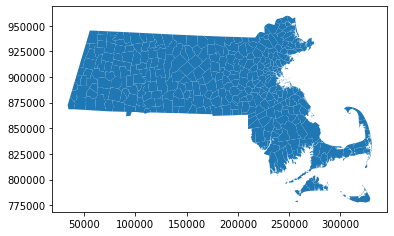

In [52]:
municip_shp.plot()

In [12]:
ed_municip_shp = gpd.sjoin(municip_shp, ed_join, how='left')

In [16]:
# Save to temp folder
ed_municip_shp.to_file(tempF('edmunicip/ed_municip.shp'))

/home/lucia/miniconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/tmp/ipykernel_28211/213215114.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  ed_municip_shp.to_file(tempF('edmunicip/ed_municip.shp'))


### Aggregating Education Data

In [65]:
def aggEd(data):
    
    data_c = data.copy()
    
    towns = data_c['TOWN'].unique()
    
    # Create a new dataframe to populate with the aggregated data
    df = gpd.GeoDataFrame(columns=data_c.columns)
    
    # Dictionary of education categories
    cats = {
        'ALWGE002': 0,   # 'no schooling completed'
        'ALWGE003': 2,   # 'nursery school'
        'ALWGE004': 4,   # 'kindergarten'
        'ALWGE005': 5,   # '1st grade'
        'ALWGE006': 6,   # '2nd grade'
        'ALWGE007': 7,   # '3rd grade'
        'ALWGE008': 8,   # '4th grade'
        'ALWGE009': 9,   # '5th grade'
        'ALWGE010': 10,  # '6th grade'
        'ALWGE011': 11,  # '7th grade'
        'ALWGE012': 12,  # '8th grade'
        'ALWGE013': 13,  # '9th grade'
        'ALWGE014': 14,  # '10th grade'
        'ALWGE015': 15,  # '11th grade'
        'ALWGE016': 15,  # '12th grade, no diploma'
        'ALWGE017': 16,  # 'Regular high school diploma'
        'ALWGE018': 16,  # 'GED or alternative credential' (equivalent to high school diploma)
        'ALWGE019': 16,  # 'Some college, less than 1 year'
        'ALWGE020': 18,  # 'Some college, 1 or more years, no degree'
        'ALWGE021': 19,  # 'Associate's degree' (2 years of college)
        'ALWGE022': 20,  # 'Bachelor's degree' (4 years of college)
        'ALWGE023': 22,  # 'Master's degree' (4 years of college, +2 years)
        'ALWGE024': 23,  # 'Professional school degree' (1-5 years)
        'ALWGE025': 25,  # 'Doctorate degree' (4 years of college, +5 years)
    }
    
    # Empty lists to store calculated education values per town
    sums = []
    his  = []
    avgs = []
    
    l = str(len(data_c))
    
    for t in towns:
        
        townSize = 0
        subtotal = 0  # placeholder for sum
        hi = 0        # placeholder for highest achieved 
        
        # Collect the rows referring to block groups in the same town
        subset = data_c[data_c['TOWN'].eq(t)]
        
        # Retain the town data, 
        # only need one per town (not one for every block group) so use 1st
        df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
        
        for index, row in subset.iterrows():
        
            townSize += row['ALWGE001']  # total reporting in ea block group
        
            for c in cats:
                subtotal += (row[c]*cats[c])
            
                if(row[c] != 0):
                    hi = cats[c]
        
        # Town sum and highest achieved
        sums.append(subtotal)
        his.append(hi)
        
        # Town average
        if(townSize != 0):
            avgs.append(subtotal/townSize)
        else:
            avgs.append(0)
    
    assert(len(sums) == len(towns))
    assert(len(his)  == len(towns))
    assert(len(avgs) == len(towns))
    
    # Save the results
    df['sumEd'] = sums
    df['hiEd']  = his
    df['avgEd'] = avgs

    return df

In [66]:
ed_data = aggEd(ed_municip_shp)

/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)


/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)


/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)


/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)


/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)


/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)


/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)


/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)


/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)


/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/540020199.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)


In [67]:
# Save to temporary folder
ed_data.to_file(tempF('edagg/ed_agg.shp'))

/home/lucia/miniconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/tmp/ipykernel_28211/951058447.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  ed_data.to_file(tempF('edagg/ed_agg.shp'))


In [71]:
pd.set_option('display.max_columns', None)

ed_data.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,POPCH80_90,SHAPE_Leng,SHAPE_Area,geometry,index_right,GISJOIN,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,TRACTA,BLKGRPA,CONCITA,AIANHHA,RES_ONLYA,TRUSTA,AIHHTLI,AITS,ANRCA,CBSAA,CSAA,METDIVA,MEMI,NECTAA,CNECTAA,NECTADIVA,UAA,CDCURRA,SLDUA,SLDLA,ZCTA5A,SUBMCDA,SDELMA,SDSECA,SDUNIA,UR,PCI,PUMA5A,GEOID_y,BTTRA,BTBGA,NAME_E,ALWGE001,ALWGE002,ALWGE003,ALWGE004,ALWGE005,ALWGE006,ALWGE007,ALWGE008,ALWGE009,ALWGE010,ALWGE011,ALWGE012,ALWGE013,ALWGE014,ALWGE015,ALWGE016,ALWGE017,ALWGE018,ALWGE019,ALWGE020,ALWGE021,ALWGE022,ALWGE023,ALWGE024,ALWGE025,NAME_M,ALWGM001,ALWGM002,ALWGM003,ALWGM004,ALWGM005,ALWGM006,ALWGM007,ALWGM008,ALWGM009,ALWGM010,ALWGM011,ALWGM012,ALWGM013,ALWGM014,ALWGM015,ALWGM016,ALWGM017,ALWGM018,ALWGM019,ALWGM020,ALWGM021,ALWGM022,ALWGM023,ALWGM024,ALWGM025,sumEd,hiEd,avgEd
0,LOWELL,160,93473,103439,105167,1728,C,4,25017,9298.78,14.531,106519,1352,9966,28403.664058,37630657.8658,"POLYGON ((216431.383 935122.985, 217384.292 93...",1873,G25001703124002,25,017,312400,2,250173124002,Block Group 2,G5030,S,226768.0,18107.0,+42.6391590,-071.3002671,2564.788341,244874.827585,2015-2019,MA,NaN,NaN,Massachusetts,25,Middlesex County,17,NaN,NaN,312400,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000US250173124002,NaN,NaN,"Block Group 2, Census Tract 3124, Middlesex Co...",1128,91,0,0,0,0,18,39,0,68,0,37,0,28,28,10,328,49,100,49,66,143,48,0,26,"Block Group 2, Census Tract 3124, Middlesex Co...",148,45,12,12,12,12,28,33,12,63,12,36,12,19,31,11,91,26,53,39,38,68,31,12,25,1605721,22,16.767656
1,BEVERLY,30,34575,38195,39862,1667,C,1,25009,9863.262,15.411,39502,-360,3620,38638.70635,39915208.4748,"MULTIPOLYGON (((247412.633 926932.675, 249132....",999,G25000902172024,25,009,217202,4,250092172024,Block Group 4,G5030,S,576115.0,147632.0,+42.5500525,-070.9062646,4091.784656,723746.953256,2015-2019,MA,NaN,NaN,Massachusetts,25,Essex County,9,NaN,NaN,217202,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000US250092172024,NaN,NaN,"Block Group 4, Census Tract 2172.02, Essex Cou...",799,0,0,0,0,0,0,21,0,0,0,21,31,17,9,26,92,10,11,94,64,270,115,10,8,"Block Group 4, Census Tract 2172.02, Essex Cou...",165,12,12,12,12,12,12,33,12,12,12,25,48,20,15,32,67,15,17,62,42,129,70,16,13,654420,25,18.772267
2,GLOUCESTER,107,28092,28716,30273,1557,C,3,25009,17088.57,26.7,28789,-1484,624,159379.402958,69154959.4924,"MULTIPOLYGON (((264186.562 935044.815, 264207....",1051,G25000902219012,25,009,221901,2,250092219012,Block Group 2,G5030,S,1050515.0,476172.0,+42.5762996,-070.7090696,8747.644512,1050516.81279,2015-2019,MA,NaN,NaN,Massachusetts,25,Essex County,9,NaN,NaN,221901,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000US250092219012,NaN,NaN,"Block Group 2, Census Tract 2219.01, Essex Cou...",830,19,0,0,0,0,0,0,0,0,0,9,0,0,0,12,102,25,32,94,106,247,135,25,24,"Block Group 2, Census Tract 2219.01, Essex Cou...",153,21,12,12,12,12,12,12,12,12,12,14,12,12,12,20,65,39,31,67,55,77,69,37,27,542952,25,18.389568
3,CHESTER,59,1182,1280,1308,28,T,4,25013,23784.924,37.164,1337,29,98,37542.272855,96254154.195,"POLYGON ((80255.212 900279.565, 84998.072 8998...",1795,G25001508227003,25,015,822700,3,250158227003,Block Group 3,G5030,S,145186523.0,445259.0,+42.3707361,-072.9657358,61103.975374,145631776.667,2015-2019,MA,NaN,NaN,Massachusetts,25,Hampshire County,15,NaN,NaN,822700,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000US250158227003,NaN,NaN,"Block Group 3, Census Tract 8227, Hampshire Co...",1351,4,0,0,0,0,0,0,0,0,0,10,18,3,19,7,392,28,75,203,163,228,151,22,28,"Blo

In [72]:
# Clean up the dataframe to keep just the columns needed for analysis

ed_data = ed_data[['TOWN', 'TOWN_ID', 'POP2010', 'POPCH00_10', 'NAME_M', 
                   'geometry', 'sumEd', 'hiEd', 'avgEd']]
ed_data.columns

Index(['TOWN', 'TOWN_ID', 'POP2010', 'POPCH00_10', 'NAME_M', 'geometry',
       'sumEd', 'hiEd', 'avgEd'],
      dtype='object')

In [75]:
# Data now ready - save it to the ready data folder

ed_data.to_file(readyF('ed/ed_data.shp'))

/home/lucia/miniconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Income Data

### Merging Income CSV and Geometry Data

In [78]:
inc     = pd.read_csv(dataF('incomeBlockGroupCSV/nhgis0003_ds244_20195_blck_grp.csv'))
inc_shp = gpd.read_file(dataF('incomeBlockGroupSHP/MA_blck_grp_2019.shp'))

In [82]:
inc_join = inc_shp.merge(inc, on='GISJOIN')

<AxesSubplot:>

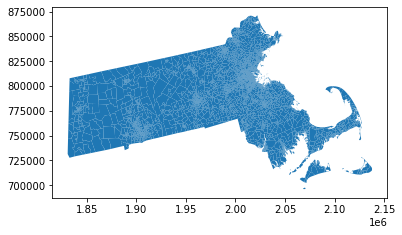

In [83]:
inc_join.plot()

In [84]:
inc_join = inc_join.to_crs('EPSG:26986')
inc_join.crs

<Derived Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [89]:
# Rename income columns so that they are readable
inc_join = inc_join.rename(columns={'ALW1E001': 'incEst', 'ALW1M001': 'incMOE'}, errors='raise')

KeyError: "['ALW1E001', 'ALW1M001'] not found in axis"

In [85]:
# Save to temp folder
inc_join.to_file(tempF('incjoin/inc_join.shp'))

/home/lucia/miniconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Joining Income and Municipality Data

In [90]:
inc_municip_shp = gpd.sjoin(municip_shp, inc_join, how='left')

In [91]:
# Save to temporary folder
inc_municip_shp.to_file(tempF('incmunicip/inc_municip.shp'))

/home/lucia/miniconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/tmp/ipykernel_28211/4004674223.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  inc_municip_shp.to_file(tempF('incmunicip/inc_municip.shp'))


<AxesSubplot:>

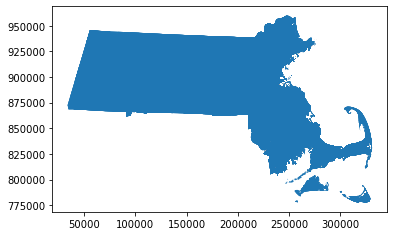

In [92]:
inc_municip_shp.plot()

### Aggregating Income Data

In [94]:
inc_municip_shp

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,POPCH80_90,SHAPE_Leng,SHAPE_Area,geometry,index_right,GISJOIN,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,TRACTA,BLKGRPA,CONCITA,AIANHHA,RES_ONLYA,TRUSTA,AIHHTLI,AITS,ANRCA,CBSAA,CSAA,METDIVA,MEMI,NECTAA,CNECTAA,NECTADIVA,UAA,CDCURRA,SLDUA,SLDLA,ZCTA5A,SUBMCDA,SDELMA,SDSECA,SDUNIA,UR,PCI,PUMA5A,GEOID_y,BTTRA,BTBGA,NAME_E,incEst,NAME_M,incMOE
0,LOWELL,160,93473,103439,105167,1728,C,4,25017,9298.78,14.531,106519,1352,9966,28403.664058,3.763066e+07,"POLYGON ((216431.383 935122.985, 217384.292 93...",1873,G25001703124002,25,017,312400,2,250173124002,Block Group 2,G5030,S,226768.0,18107.0,+42.6391590,-071.3002671,2564.788341,2.448748e+05,2015-2019,MA,NaN,NaN,Massachusetts,25,Middlesex County,17,NaN,NaN,312400,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000US250173124002,NaN,NaN,"Block Group 2, Census Tract 3124, Middlesex Co...",42500.0,"Block Group 2, Census Tract 3124, Middlesex Co...",21948.0
0,LOWELL,160,93473,103439,105167,1728,C,4,25017,9298.78,14.531,106519,1352,9966,28403.664058,3.763066e+07,"POLYGON ((216431.383 935122.985, 217384.292 93...",1878,G25001703125022,25,017,312502,2,250173125022,Block Group 2,G5030,S,399224.0,0.0,+42.6412681,-071.2837026,2568.442316,3.992263e+05,2015-2019,MA,NaN,NaN,Massachusetts,25,Middlesex County,17,NaN,NaN,312502,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000US250173125022,NaN,NaN,"Block Group 2, Census Tract 3125.02, Middlesex...",114167.0,"Block Group 2, Census Tract 3125.02, Middlesex...",34473.0
0,LOWELL,160,93473,103439,105167,1728,C,4,25017,9298.78,14.531,106519,1352,9966,28403.664058,3.763066e+07,"POLYGON ((216431.383 935122.985, 217384.292 93...",1834,G25001703111002,25,017,311100,2,250173111002,Block Group 2,G5030,S,335108.0,15962.0,+42.6420485,-071.3200355,2598.586674,3.510714e+05,2015-2019,MA,NaN,NaN,Massachusetts,25,Middlesex County,17,NaN,NaN,311100,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000US250173111002,NaN,NaN,"Block Group 2, Census Tract 3111, Middlesex Co...",61125.0,"Block Group 2, Census Tract 3111, Middlesex Co...",25812.0
0,LOWELL,160,93473,103439,105167,1728,C,4,25017,9298.78,14.531,106519,1352,9966,28403.664058,3.763066e+07,"POLYGON ((216431.383 935122.985, 217384.292 93...",1875,G25001703125012,25,017,312501,2,250173125012,Block Group 2,G5030,S,452618.0,0.0,+42.6430585,-071.2755761,3201.245717,4.526173e+05,2015-2019,MA,NaN,NaN,Massachusetts,25,Middlesex County,17,NaN,NaN,312501,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000US250173125012,NaN,NaN,"Block Group 2, Census Tract 3125.01, Middlesex...",93088.0,"Block Group 2, Census Tract 3125.01, Middlesex...",34589.0
0,LOWELL,160,93473,103439,105167,1728,C,4,25017,9298.78,14.531,106519,1352,9966,28403.664058,3.763066e+07,"POLYGON ((216431.383 935122.985, 217384.292 93...",1805,G25001703101002,25,017,310100,2,250173101002,Block Group 2,G5030,S,292935.0,32810.0,+42.6434505,-071.3128709,2878.379162,3.257436e+05,2015-2019,MA,NaN,NaN,Massachusetts,25,Middlesex County,17,NaN,NaN,310100,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000US250173101002,NaN,NaN,"Block Group 2, Census Tract 3101, Middlesex Co...",43750.0,"Block Group 2, Census Tract 3101, Middlesex Co...",27830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [118]:
# Set aside NaN data - will use later for a missing data model
inc_municip_NAN = inc_municip_shp[inc_municip_shp['incEst'].isna()]

# Save to a temporary folder
inc_municip_NAN.to_file(tempF('incNAN/inc_nan.shp'))

/home/lucia/miniconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/tmp/ipykernel_28211/1705792431.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  inc_municip_NAN.to_file(tempF('incNAN/inc_nan.shp'))


In [119]:
# Extract the non-NaN data to use below
inc_municip = inc_municip_shp[inc_municip_shp['incEst'].notna()]

In [137]:
def aggInc(data):
    
    data_c = data.copy()
    
    towns = data_c['TOWN'].unique()
    
    # Create a new dataframe to populate with the aggregated data
    df = gpd.GeoDataFrame(columns=data_c.columns)
    
    # Empty lists to store calculated income values per town
    sums = []
    avgs = []
    moes = []
    
    l = str(len(data_c))
    
    for t in towns:
        
        townSize = 0
        subtotal = 0  # placeholder for sum
        moe = 0       # placeholder for margin of error
        
        # Collect the rows referring to block groups in the same town
        subset = data_c[data_c['TOWN'].eq(t)]
        
        # Retain the town data, 
        # only need one per town (not one for every block group) so use 1st
        df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
        
        for index, row in subset.iterrows():
        
            townSize += 1  # increment by 1 for ea block group
            
            subtotal += row['incEst']
            moe += row['incMOE']**2
                
        # Town sum and highest achieved
        sums.append(round(subtotal, 2))
        moes.append(round(moe**0.5, 2))
        
        # Town average
        if(townSize != 0):
            avgs.append(round(subtotal/townSize, 2))
        else:
            avgs.append(0)
                
    assert(len(sums) == len(towns))
    assert(len(avgs) == len(towns))
    assert(len(moes) == len(towns))
    
    # Save the results
    df['sumInc'] = sums
    df['avgInc'] = avgs
    df['moeInc'] = moes

    return df

In [138]:
inc_data = aggInc(inc_municip)

/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=Tr

/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=Tr

/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=Tr

/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=Tr

/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=Tr

/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=Tr

/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=Tr

/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=Tr

/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=True)
/tmp/ipykernel_28211/4013342654.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1]) # gpd.concat([df, subset[:1]], ignore_index=Tr

In [139]:
inc_data

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,POPCH80_90,SHAPE_Leng,SHAPE_Area,geometry,index_right,GISJOIN,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,TRACTA,BLKGRPA,CONCITA,AIANHHA,RES_ONLYA,TRUSTA,AIHHTLI,AITS,ANRCA,CBSAA,CSAA,METDIVA,MEMI,NECTAA,CNECTAA,NECTADIVA,UAA,CDCURRA,SLDUA,SLDLA,ZCTA5A,SUBMCDA,SDELMA,SDSECA,SDUNIA,UR,PCI,PUMA5A,GEOID_y,BTTRA,BTBGA,NAME_E,incEst,NAME_M,incMOE,sumInc,avgInc,moeInc
0,LOWELL,160,93473,103439,105167,1728,C,4,25017,9298.78,14.531,106519,1352,9966,28403.664058,37630657.8658,"POLYGON ((216431.383 935122.985, 217384.292 93...",1873,G25001703124002,25,017,312400,2,250173124002,Block Group 2,G5030,S,226768.0,18107.0,+42.6391590,-071.3002671,2564.788341,244874.827585,2015-2019,MA,NaN,NaN,Massachusetts,25,Middlesex County,17,NaN,NaN,312400,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000US250173124002,NaN,NaN,"Block Group 2, Census Tract 3124, Middlesex Co...",42500.0,"Block Group 2, Census Tract 3124, Middlesex Co...",21948.0,6539461.0,68836.43,265015.66
1,BEVERLY,30,34575,38195,39862,1667,C,1,25009,9863.262,15.411,39502,-360,3620,38638.70635,39915208.4748,"MULTIPOLYGON (((247412.633 926932.675, 249132....",999,G25000902172024,25,009,217202,4,250092172024,Block Group 4,G5030,S,576115.0,147632.0,+42.5500525,-070.9062646,4091.784656,723746.953256,2015-2019,MA,NaN,NaN,Massachusetts,25,Essex County,9,NaN,NaN,217202,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000US250092172024,NaN,NaN,"Block Group 4, Census Tract 2172.02, Essex Cou...",105893.0,"Block Group 4, Census Tract 2172.02, Essex Cou...",32725.0,3567039.0,104912.91,NaN
2,GLOUCESTER,107,28092,28716,30273,1557,C,3,25009,17088.57,26.7,28789,-1484,624,159379.402958,69154959.4924,"MULTIPOLYGON (((264186.562 935044.815, 264207....",1051,G25000902219012,25,009,221901,2,250092219012,Block Group 2,G5030,S,1050515.0,476172.0,+42.5762996,-070.7090696,8747.644512,1050516.81279,2015-2019,MA,NaN,NaN,Massachusetts,25,Essex County,9,NaN,NaN,221901,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000US250092219012,NaN,NaN,"Block Group 2, Census Tract 2219.01, Essex Cou...",72143.0,"Block Group 2, Census Tract 2219.01, Essex Cou...",24751.0,2368987.0,81689.21,183197.12
3,CHESTER,59,1182,1280,1308,28,T,4,25013,23784.924,37.164,1337,29,98,37542.272855,96254154.195,"POLYGON ((80255.212 900279.565, 84998.072 8998...",1795,G25001508227003,25,015,822700,3,250158227003,Block Group 3,G5030,S,145186523.0,445259.0,+42.3707361,-072.9657358,61103.975374,145631776.667,2015-2019,MA,NaN,NaN,Massachusetts,25,Hampshire County,15,NaN,NaN,822700,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000US250158227003,NaN,NaN,"Block Group 3, Census Tract 8227, Hampshire Co...",73466.0,"Block Group 3, Census Tract 8227, Hampshire Co...",8021.0,446143.0,74357.17,27900.76
4,WINCHESTER,344,20021,20267,20810,543,T,2,25017,4062.159,6.347,21374,564,246,19080.564132,16439015.8068,"POLYGON ((232109.422 913780.365, 231307.062 91...",2223,G25001703392001,25,017,339200,1,250173392001,Block Group 1,G5030,S,1018890.0,34163.0,+42.4337720,-071.1385474,5062.517294,1053055.01146,2015-2019,MA,NaN,NaN,Massachusetts,25,Middlesex County,17,NaN,NaN,339200,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000US250173392001,NaN,NaN,"Block Group 1, Census Tract 3392, Middlesex Co...",209297.0,"Block Group 1, Census Tract 3392, Middlesex Co...",51311.0,4859934.0,156772.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [141]:
# Clean up the dataframe to keep just the columns needed for analysis

inc_data = inc_data[['TOWN', 'TOWN_ID', 'POP2010', 'POPCH00_10', 'NAME_M', 
                     'geometry', 'sumInc', 'avgInc', 'moeInc']]

In [144]:
# Data now ready - save it to the ready data folder

inc_data.to_file(readyF('inc/inc_data.shp'))

/home/lucia/miniconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Utility Data

In [145]:
util = gpd.read_file(dataF('utilityServiceProviders/TOWNS_POLY_V_ELEC.shp'))

In [151]:
util

,TOWN,TOWN_ID,ELEC,ELEC_LABEL,SHAPE_Leng,SHAPE_Area,geometry
0,SEEKONK,265,National Grid (Massachusetts Electric),Massachusetts Electric d/b/a National Grid,36129.414061,4.828947e+07,"POLYGON ((217255.492 836086.505, 215267.453 83..."
1,LAKEVILLE,146,"Middleborough Gas and Electric Department, Eve...","Municipal, NSTAR Electric d/b/a Eversource Energy",47022.080298,9.354812e+07,"POLYGON ((242739.123 850918.935, 242754.672 85..."
2,REHOBOTH,247,National Grid (Massachusetts Electric),Massachusetts Electric d/b/a National Grid,48076.072216,1.229558e+08,"POLYGON ((224212.852 850986.925, 225395.392 85..."
3,CARVER,52,Eversource Energy (NSTAR Electric),NSTAR Electric d/b/a Eversource Energy,47726.190678,1.028806e+08,"POLYGON ((261908.083 853925.295, 262148.083 85..."
4,MIDDLEBOROUGH,182,"Middleborough Gas and Electric Department, Eve...","Municipal, NSTAR Electric d/b/a Eversource Energy",72570.783384,1.870011e+08,"POLYGON ((249036.322 857499.955, 249043.002 85..."
...,...,...,...,...,...,...,...
346,SALISBURY,259,National Grid (Massachusetts Electric),Massachusetts Electric d/b/a National Grid,30751.225042,4.208493e+07,"POLYGON ((250194.972 959315.315, 253308.672 95..."
347,GOSNOLD,109,Gosnold Electric Light,Municipal,90636.449199,3.437546e+07,"MULTIPOLYGON (((248384.107 797715.645, 248386...."
348,LYNNFIELD,164,"Peabody Municipal Light Plant, Reading Municip...",Municipal,27878.230478,2.704235e+07,"POLYGON ((236560.782 924900.225, 236574.733 92..."
349,WAKEFIELD,305,Wakefield Municipal Light Department,Municipal,22390.042685,2.070844e+07,"POLYGON ((235427.602 919563.805, 235530.722 91..."


In [153]:
util['ELEC_LABEL'].unique()

array(['Massachusetts Electric d/b/a National Grid',
       'Municipal, NSTAR Electric d/b/a Eversource Energy',
       'NSTAR Electric d/b/a Eversource Energy', 'Municipal',
       'Nantucket Electric Company d/b/a National Grid',
       'NSTAR Electric d/b/a Eversource Energy, Massachusetts Electric d/b/a National Grid',
       'Municipal, Massachusetts Electric d/b/a National Grid', 'UNITIL'],
      dtype=object)

In [162]:
def utilCode(data):
    
    data_c = data.copy()
    
    utils = {'Massachusetts Electric d/b/a National Grid': 0,
             'Municipal, NSTAR Electric d/b/a Eversource Energy': 1,
             'NSTAR Electric d/b/a Eversource Energy': 2,
             'Municipal': 3,
             'Nantucket Electric Company d/b/a National Grid': 4,
             'NSTAR Electric d/b/a Eversource Energy, Massachusetts Electric d/b/a National Grid': 5,
             'Municipal, Massachusetts Electric d/b/a National Grid': 6,
             'UNITIL': 7
            }
    
    # Empty list to store the codes for each town
    util_codes = []
        
    for index, row in data_c.iterrows():
        
        code = utils[row['ELEC_LABEL']]
        util_codes.append(code)
            
    assert(len(util_codes) == len(data_c))
    
    data_c['utilCode'] = util_codes
    
    return data_c

In [165]:
util_data = utilCode(util)

In [166]:
# Clean up data frame to keep just the columns necessary for analysis
util_data = util_data[['TOWN', 'TOWN_ID', 'ELEC_LABEL', 'geometry', 
                       'utilCode']]

util_data.columns

Index(['TOWN', 'TOWN_ID', 'ELEC_LABEL', 'geometry', 'utilCode'], dtype='object')

In [167]:
# Data now ready - save to the ready folder
util_data.to_file(readyF('util/util_data.shp'))

/home/lucia/miniconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## PV Installations Data

In [168]:
pv = pd.read_csv(dataF('existPV/existPV.csv'))

In [170]:
pv['Facility Type'].unique()

array(['Residential (3 or fewer dwelling units per building)', 'Other',
       'School (K-12)', 'Municipal / Government / Public',
       'Commercial / Office', 'Retail', 'College / University',
       'Municipal - K-12 School', 'Agricultural', 'Religious',
       'Mixed use (commercial & residential)', 'Industrial',
       'Multi-family residential (4 or more dwelling units per building)',
       'Hospital / Health Care', 'Restaurant / Food Service', 'Federal',
       'Community Solar', 'State', 'State - College/University'],
      dtype=object)

In [173]:
# Isolate the residential installations and those that are not third-party owned

i = pv['Facility Type'].eq('Residential (3 or fewer dwelling units per building)')
i |= pv['Facility Type'].eq('Mixed use (commercial & residential)')
i |= pv['Facility Type'].eq('Multi-family residential (4 or more dwelling units per building)')
i &= pv['3rd Party Owner'].eq('N')

pv = pv[i]

In [174]:
pv

,"Capacity \n(DC, kW)",Date In Service,Total Cost with Design Fees,Total Grant,City,Zip,County,Program Name,Facility Type,Installer,Module Manufacturer,Inverter Manufacturer,Meter Manufacturer,Utility,3rd Party Owner,SREC Eligible,Estimated Annual Production (kWhr)
0,0.500,01/01/2000,0.01,0.00,Amherst,1002,Hampshire,Non-RET Funded Grants,Residential (3 or fewer dwelling units per bui...,WMECO,TBD,TBD,TBD,WMECO (DBA EverSource),N,N,509.700600
1,0.540,07/31/2001,2600.00,0.00,Springfield,1109,Hampden,Non-RET Funded Grants,Residential (3 or fewer dwelling units per bui...,WMECO,TBD,TBD,General Electric,WMECO (DBA EverSource),N,N,550.476648
5,2.200,04/17/2003,16621.00,9256.50,Boston,2132,Suffolk,Clustered PV Installations Grants|Massachusett...,Residential (3 or fewer dwelling units per bui...,Zapotec Energy,Evergreen Solar,SMA America,General Electric,NSTAR (DBA EverSource),N,N,2831.000000
6,2.244,05/05/2003,16621.00,9256.50,Newton,2458,Middlesex,Clustered PV Installations Grants|Massachusett...,Residential (3 or fewer dwelling units per bui...,Zapotec Energy,Evergreen Solar,SMA America,General Electric,NSTAR (DBA EverSource),N,N,2831.000000
7,2.100,05/05/2003,16006.95,8835.75,Newton,2464,Middlesex,Clustered PV Installations Grants,Residential (3 or fewer dwelling units per bui...,Zapotec Energy,Evergreen Solar,SMA America,General Electric,NSTAR (DBA EverSource),N,N,2703.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121585,2.850,NaN,19735.00,0.00,Greenfield,1301,Franklin,Green Affordable Housing Initiative,Residential (3 or fewer dwelling units per bui...,"NorthEast Solar Design Associates, LLC (former...",Evergreen Solar,SMA America,TBD,WMECO (DBA EverSource),N,N,3300.000000
121588,11.520,NaN,48971.83,2000.00,Warren,1083,Worcester,Commonwealth Solar II,Residential (3 or fewer dwelling units per bui...,Endless Mountains Solar Services,SolarWorld,OutBack Power,TBD,National Grid,N,N,12583.000000
121589,4.860,NaN,19846.00,0.00,Needham,2492,Norfolk,Solarize Massachusetts - Zero Incentive,Residential (3 or fewer dwelling units per bui...,Direct Energy Solar,NaN,NaN,TBD,NSTAR (DBA EverSource),N,N,4737.000000
121590,3.000,NaN,12950.00,1950.00,Boston,2131,Suffolk,Commonwealth Solar II,Residential (3 or fewer dwelling units per bui...,SunBug Solar,TBD,TBD,TBD,NSTAR (DBA EverSource),N,N,3731.000000


In [194]:
pv['City'].apply(lambda x: x.upper())
pv

,"Capacity \n(DC, kW)",Date In Service,Total Cost with Design Fees,Total Grant,City,Zip,County,Program Name,Facility Type,Installer,Module Manufacturer,Inverter Manufacturer,Meter Manufacturer,Utility,3rd Party Owner,SREC Eligible,Estimated Annual Production (kWhr)
0,0.500,01/01/2000,0.01,0.00,AMHERST,1002,Hampshire,Non-RET Funded Grants,Residential (3 or fewer dwelling units per bui...,WMECO,TBD,TBD,TBD,WMECO (DBA EverSource),N,N,509.700600
1,0.540,07/31/2001,2600.00,0.00,SPRINGFIELD,1109,Hampden,Non-RET Funded Grants,Residential (3 or fewer dwelling units per bui...,WMECO,TBD,TBD,General Electric,WMECO (DBA EverSource),N,N,550.476648
5,2.200,04/17/2003,16621.00,9256.50,BOSTON,2132,Suffolk,Clustered PV Installations Grants|Massachusett...,Residential (3 or fewer dwelling units per bui...,Zapotec Energy,Evergreen Solar,SMA America,General Electric,NSTAR (DBA EverSource),N,N,2831.000000
6,2.244,05/05/2003,16621.00,9256.50,NEWTON,2458,Middlesex,Clustered PV Installations Grants|Massachusett...,Residential (3 or fewer dwelling units per bui...,Zapotec Energy,Evergreen Solar,SMA America,General Electric,NSTAR (DBA EverSource),N,N,2831.000000
7,2.100,05/05/2003,16006.95,8835.75,NEWTON,2464,Middlesex,Clustered PV Installations Grants,Residential (3 or fewer dwelling units per bui...,Zapotec Energy,Evergreen Solar,SMA America,General Electric,NSTAR (DBA EverSource),N,N,2703.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121585,2.850,NaN,19735.00,0.00,GREENFIELD,1301,Franklin,Green Affordable Housing Initiative,Residential (3 or fewer dwelling units per bui...,"NorthEast Solar Design Associates, LLC (former...",Evergreen Solar,SMA America,TBD,WMECO (DBA EverSource),N,N,3300.000000
121588,11.520,NaN,48971.83,2000.00,WARREN,1083,Worcester,Commonwealth Solar II,Residential (3 or fewer dwelling units per bui...,Endless Mountains Solar Services,SolarWorld,OutBack Power,TBD,National Grid,N,N,12583.000000
121589,4.860,NaN,19846.00,0.00,NEEDHAM,2492,Norfolk,Solarize Massachusetts - Zero Incentive,Residential (3 or fewer dwelling units per bui...,Direct Energy Solar,NaN,NaN,TBD,NSTAR (DBA EverSource),N,N,4737.000000
121590,3.000,NaN,12950.00,1950.00,BOSTON,2131,Suffolk,Commonwealth Solar II,Residential (3 or fewer dwelling units per bui...,SunBug Solar,TBD,TBD,TBD,NSTAR (DBA EverSource),N,N,3731.000000


In [195]:
pv.columns

Index(['Capacity \n(DC, kW)', 'Date In Service', 'Total Cost with Design Fees',
       'Total Grant', 'City', 'Zip', 'County', 'Program Name', 'Facility Type',
       'Installer', 'Module Manufacturer', 'Inverter Manufacturer',
       'Meter Manufacturer', 'Utility', '3rd Party Owner', 'SREC Eligible',
       'Estimated Annual Production (kWhr)'],
      dtype='object')

### Aggregating PV Installations Data

In [205]:
# TODO: write method to sum up installations in ea town and compute grants (sum, avg, $/estkWhr, $/capkW)

def aggPV(data):
    
    data_c = data.copy()
    
    towns = data_c['City'].unique()
    
    # Create a new dataframe to populate with the aggregated data
    df = gpd.GeoDataFrame(columns=data_c.columns)
    
    # Empty lists to store calculated values per town:
    N = []     # total no. installed
    
    # Grants:
    grant_sums = []
    grant_avgs = []
    
    # Installation cost:
    cost_sums = []
    cost_avgs = []
    
    # Capacitiy (kW):
    cap_sums = []
    cap_avgs = []
    
    # Est. annual production (kWh):
    prod_sums = []
    prod_avgs = []
    
    l = str(len(data_c))
    
    for t in towns:
        
        n = 0      # placeholder for total number
        g_s = 0    # placeholder for grant sum
        cos_s = 0  # placeholder for installation cost sum
        cap_s = 0  # placeholder for capacity sum
        p_s = 0    # placeholder for production sum
        
        # Collect the rows referring to installations in the same town
        subset = data_c[data_c['City'].eq(t)]
        
        # Retain the town data, 
        # only need one per town (not one for every installation) so use 1st
        df = df.append(subset[:1]) 
        
        for index, row in subset.iterrows():
        
            n += 1  # increment by 1 for ea installation
            
            g_s += row['Total Grant']
            cos_s += row['Total Cost with Design Fees']
            cap_s += row['Capacity \n(DC, kW)']
            p_s += row['Estimated Annual Production (kWhr)']
                
        # Town sums 
        N.append(n)
        cost_sums.append(cos_s)
        grant_sums.append(g_s)
        cap_sums.append(cap_s)
        prod_sums.append(p_s)
        
        # Town averages
        if(n != 0):
            cost_avgs.append(round(cos_s/n, 2))
            grant_avgs.append(round(g_s/n, 2))
            cap_avgs.append(round(cap_s/n, 2))
            prod_avgs.append(round(p_s/n, 2))
        else:
            cost_avgs.append(0)
            grant_avgs.append(0)
            cap_avgs.append(0)
            prod_avgs.append(0)
                
    assert(len(N)          == len(towns))
    assert(len(cost_sums)  == len(towns))
    assert(len(grant_sums) == len(towns))
    assert(len(cap_sums)   == len(towns))
    assert(len(prod_sums)  == len(towns))
    assert(len(cost_avgs)  == len(towns))
    assert(len(grant_avgs) == len(towns))
    assert(len(cap_avgs)   == len(towns))
    assert(len(prod_avgs)  == len(towns))
    
    # Save the results
    df['totalInst']     = N
    df['totalCost']     = cost_sums
    df['avgCost']       = cost_avgs
    df['totalGrant']    = grant_sums
    df['avgGrant']      = grant_avgs
    df['totalCap_kW']   = cap_sums
    df['avgCap_kW']     = cap_avgs
    df['totalProd_kWh'] = prod_sums
    df['avgProd_kWh']   = prod_avgs

    return df

In [206]:
pv_data = aggPV(pv)

/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[

/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[

/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[

/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[

/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[

/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[

/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[

/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[:1])
/tmp/ipykernel_28211/3343549628.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(subset[

In [200]:
pv_data.columns

Index(['Capacity \n(DC, kW)', 'Date In Service', 'Total Cost with Design Fees',
       'Total Grant', 'City', 'Zip', 'County', 'Program Name', 'Facility Type',
       'Installer', 'Module Manufacturer', 'Inverter Manufacturer',
       'Meter Manufacturer', 'Utility', '3rd Party Owner', 'SREC Eligible',
       'Estimated Annual Production (kWhr)', 'totalInst', 'totalGrant',
       'avgGrant', 'totalCap_kW', 'avgCap_kW', 'totalProd_kWh', 'avgProd_kWh'],
      dtype='object')

In [201]:
# Clean up the data frame to keep just the columns necessary for analysis

pv_data = pv_data[['City', 'totalInst', 'totalCost', 'avgCost', 'totalGrant', 
                   'avgGrant', 'totalCap_kW', 'avgCap_kW', 'totalProd_kWh', 
                   'avgProd_kWh']]

pv_data = pv_data.rename(columns={'City': 'TOWN'})

In [202]:
pv_data.columns

Index(['TOWN', 'totalInst', 'totalGrant', 'avgGrant', 'totalCap_kW',
       'avgCap_kW', 'totalProd_kWh', 'avgProd_kWh'],
      dtype='object')

In [ ]:
# TODO: also include installation cost?

In [ ]:
# Sources:
#  1. ACS Data Uncertainty Paper: 
#     https://ecommons.cornell.edu/bitstream/handle/1813/38122/Folch-etal_2014.pdf?sequence=2&isAllowed=y
#  2. US Census Bureau report:
#     https://www.census.gov/content/dam/Census/library/publications/2009/acs/ACSResearch.pdf